# Exercise 3

Solve Lorentz equation for ρ=10, ρ=28, ρ=35 and train NN to frot *t* to *t+Δt*

Then evaluate etwork predictions for ρ=17, ρ=40

We import usefull libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D

import tensorflow as tf
import tensorflow.keras as tfk
from keras import layers
from sklearn.model_selection import train_test_split


from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras import optimizers
from keras.layers import Activation
from keras.utils.generic_utils import get_custom_objects
from keras import backend as K


rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [8, 8]

Lorentz system is solved for ρ=10, ρ=28, ρ=35

We consider 100 trajectories starting from different initial conditions for each value of ρ 

(801,)


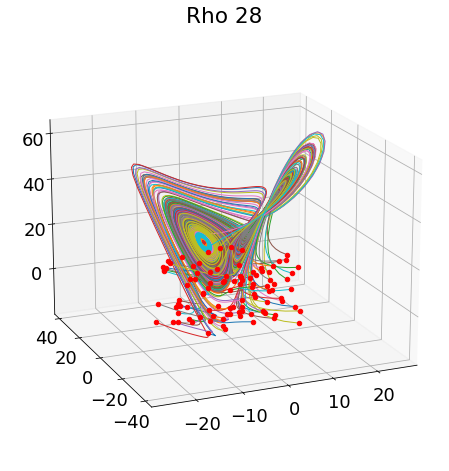

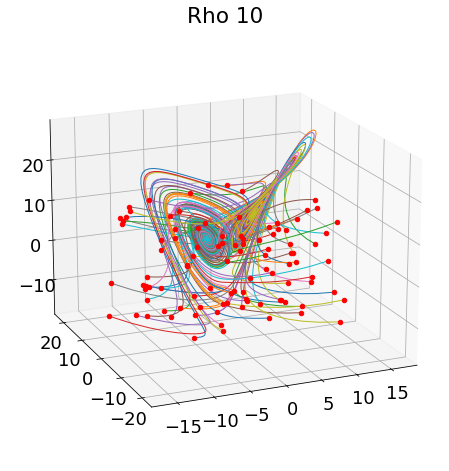

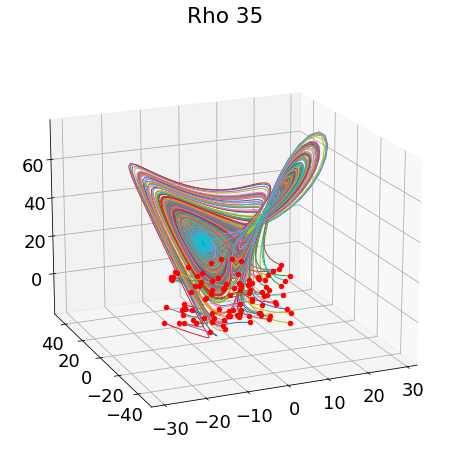

In [2]:
## Simulate the Lorenz System

dt = 0.01
T = 8
t = np.arange(0, T+dt, dt)
beta = 8/3
sigma = 10


print(t.shape)



np.random.seed(123)
x0 = -15 + 30 * np.random.random((100, 3))

rho = 28
def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
    x, y, z = x_y_z
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]
x_t_28 = np.asarray([integrate.odeint(lorenz_deriv, x0_j, t)
                  for x0_j in x0])
rho = 10
def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
    x, y, z = x_y_z
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]
x_t_10 = np.asarray([integrate.odeint(lorenz_deriv, x0_j, t)
                  for x0_j in x0])
rho = 35
def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
    x, y, z = x_y_z
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]
x_t_35 = np.asarray([integrate.odeint(lorenz_deriv, x0_j, t)
                  for x0_j in x0])

nn_input_28 = np.zeros((100*(len(t)-1),4))
nn_output_28 = np.zeros((100*(len(t)-1),3))
nn_input_28[:,-1] = np.ones((100*(len(t)-1)))*28
nn_output_28[:,-1] = np.ones((100*(len(t)-1)))*28
nn_input_10 = np.zeros((100*(len(t)-1),4))
nn_output_10 = np.zeros((100*(len(t)-1),3))
nn_input_10[:,-1] = np.ones((100*(len(t)-1)))*10
nn_output_10[:,-1] = np.ones((100*(len(t)-1)))*10
nn_input_35 = np.zeros((100*(len(t)-1),4))
nn_output_35 = np.zeros((100*(len(t)-1),3))
nn_input_35[:,-1] = np.ones((100*(len(t)-1)))*35
nn_output_35[:,-1] = np.ones((100*(len(t)-1)))*35

fig, ax=plt.subplots(1,1,subplot_kw={'projection': '3d'})
for j in range(100):
    nn_input_28[j*(len(t)-1):(j+1)*(len(t)-1),:-1] = x_t_28[j,:-1,:]
    nn_output_28[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t_28[j,1:,:]
    x, y, z = x_t_28[j,:,:].T
    ax.plot(x, y, z,linewidth=1)
    ax.scatter(x0[j,0],x0[j,1],x0[j,2],color='r')
ax.view_init(18, -113)
plt.title('Rho 28')
plt.show()
fig, ax=plt.subplots(1,1,subplot_kw={'projection': '3d'})
for j in range(100):
    nn_input_10[j*(len(t)-1):(j+1)*(len(t)-1),:-1] = x_t_10[j,:-1,:]
    nn_output_10[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t_10[j,1:,:]
    x, y, z = x_t_10[j,:,:].T
    ax.plot(x, y, z,linewidth=1)
    ax.scatter(x0[j,0],x0[j,1],x0[j,2],color='r')
ax.view_init(18, -113)
plt.title('Rho 10')
plt.show()                            
fig, ax=plt.subplots(1,1,subplot_kw={'projection': '3d'})    
for j in range(100):
    nn_input_35[j*(len(t)-1):(j+1)*(len(t)-1),:-1] = x_t_35[j,:-1,:]
    nn_output_35[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t_35[j,1:,:]
    x, y, z = x_t_35[j,:,:].T
    ax.plot(x, y, z,linewidth=1)
    ax.scatter(x0[j,0],x0[j,1],x0[j,2],color='r')
ax.view_init(18, -113)
plt.title('Rho 35')
plt.show()                             


We define options usefull for training

In [3]:
callbacks = [tfk.callbacks.EarlyStopping(monitor = "val_loss",
                           patience = 200,
                           restore_best_weights = True),
    tfk.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                   factor = 0.5,
                                   patience = 5,
                                   min_lr = 1e-6)]
            
metrics = [tf.keras.metrics.RootMeanSquaredError(name="RMSE", dtype=None),
          tf.keras.metrics.MeanAbsoluteError(name="mae", dtype=None)]
batch_size = 32
epochs = 1000

2022-07-15 12:44:05.677477: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-15 12:44:05.788656: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-15 12:44:05.789492: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-15 12:44:05.790423: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [4]:
nn_input = np.concatenate((nn_input_35, nn_input_10, nn_input_28),axis=0)
nn_output = np.concatenate((nn_output_35, nn_output_10, nn_output_28),axis=0)
min_i = np.min(nn_input,axis=0)
max_i = np.max(nn_input,axis=0)
nn_input_n = (nn_input-min_i)/(max_i-min_i)
nn_output_n = (nn_output-min_i[0:3])/(max_i[0:3]-min_i[0:3])

In [5]:
# Build model
deep_approx = tfk.models.Sequential()
deep_approx.add(layers.Dense(12, input_dim=4, activation='relu'))
deep_approx.add(layers.Dense(12, activation='relu'))
deep_approx.add(layers.Dense(12, activation='relu'))
deep_approx.add(layers.Dense(3, activation='linear'))

# Compile model
deep_approx.compile(loss='mse', optimizer='adam', metrics=metrics)

# Fit!
history = deep_approx.fit(nn_input_n, nn_output_n, batch_size = batch_size,
        epochs = epochs, callbacks = callbacks,
        validation_split = 0.15).history 
                          #batch_size=50, 
#            validation_data=(nn_input, nn_output))
#            callbacks=keras.callbacks.EarlyStopping(patience=20))

2022-07-15 12:44:08.889498: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/1000
6375/6375 [==============================] - 14s 2ms/step - loss: 0.0015 - RMSE: 0.0384 - mae: 0.0113 - val_loss: 4.2439e-05 - val_RMSE: 0.0065 - val_mae: 0.0051
Epoch 2/1000
6375/6375 [==============================] - 13s 2ms/step - loss: 2.0830e-05 - RMSE: 0.0046 - mae: 0.0028 - val_loss: 9.7962e-06 - val_RMSE: 0.0031 - val_mae: 0.0018
Epoch 3/1000
6375/6375 [==============================] - 15s 2ms/step - loss: 1.1454e-05 - RMSE: 0.0034 - mae: 0.0021 - val_loss: 1.1701e-05 - val_RMSE: 0.0034 - val_mae: 0.0022
Epoch 4/1000
6375/6375 [==============================] - 13s 2ms/step - loss: 1.0355e-05 - RMSE: 0.0032 - mae: 0.0021 - val_loss: 8.3945e-06 - val_RMSE: 0.0029 - val_mae: 0.0022
Epoch 5/1000
6375/6375 [==============================] - 14s 2ms/step - loss: 7.4044e-06 - RMSE: 0.0027 - mae: 0.0018 - val_loss: 5.0051e-06 - val_RMSE: 0.0022 - val_mae: 0.0013
Epoch 6/1000
6375/6375 [==============================] - 13s 2ms/step - loss: 6.7987e-06 - RMSE: 0.0026 - ma

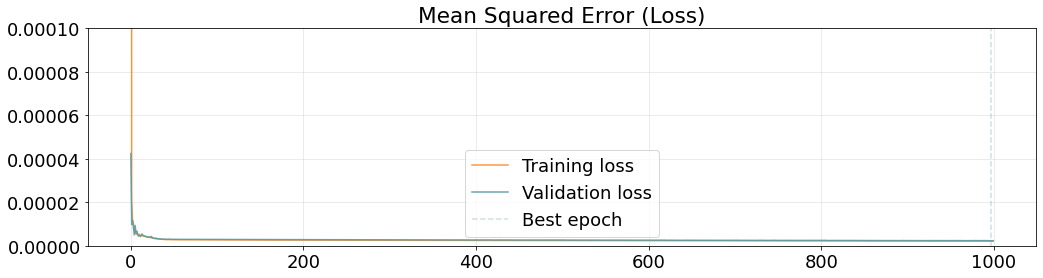

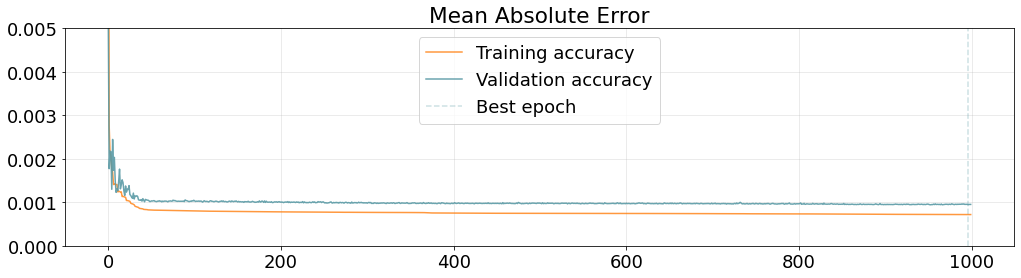

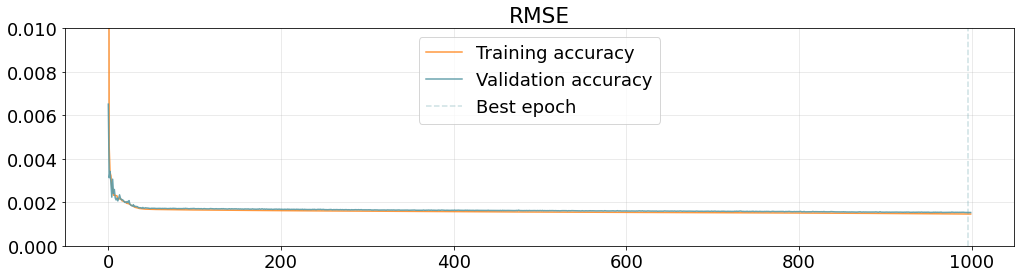

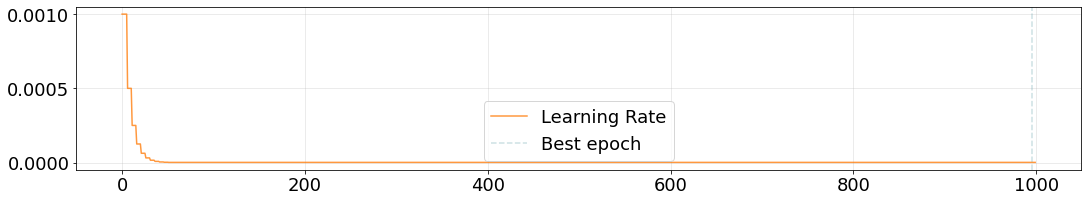

In [6]:
best_epoch = np.argmin(history['val_loss'])
plt.figure(figsize=(17,4))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.plot(history['val_loss'], label='Validation loss', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Mean Squared Error (Loss)')
plt.legend()
plt.grid(alpha=.3)
plt.ylim(0,.0001)
plt.show()

plt.figure(figsize=(17,4))
plt.plot(history['mae'], label='Training accuracy', alpha=.8, color='#ff7f0e')
plt.plot(history['val_mae'], label='Validation accuracy', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Mean Absolute Error')
plt.legend()
plt.grid(alpha=.3)
plt.ylim(0,.005)
plt.show()

plt.figure(figsize=(17,4))
plt.plot(history['RMSE'], label='Training accuracy', alpha=.8, color='#ff7f0e')
plt.plot(history['val_RMSE'], label='Validation accuracy', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('RMSE')
plt.legend()
plt.grid(alpha=.3)
plt.ylim(0,.01)
plt.show()

plt.figure(figsize=(18,3))
plt.plot(history['lr'], label='Learning Rate', alpha=.8, color='#ff7f0e')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.legend()
plt.grid(alpha=.3)
plt.show()


In [7]:
# from tqdm import tqdm
np.random.seed(159)
num_traj = 10

nn_flow_10 = np.zeros((num_traj, len(t), 4))
nn_flow_10[:, 0, 0:3] = -15 + 30 * np.random.random((num_traj, 3))
nn_flow_10[:, :, -1] = 10*np.ones((num_traj, len(t)))
nn_flow_28 = np.zeros((num_traj, len(t), 4))
nn_flow_28[:, 0, 0:3] = -15 + 30 * np.random.random((num_traj, 3))
nn_flow_28[:, :, -1] = 28*np.ones((num_traj, len(t)))
nn_flow_35 = np.zeros((num_traj, len(t), 4))
nn_flow_35[:, 0, 0:3] = -15 + 30 * np.random.random((num_traj, 3))
nn_flow_35[:, :, -1] = 35*np.ones((num_traj, len(t)))

nn_flow_10 = (nn_flow_10-min_i)/(max_i-min_i)
nn_flow_28 = (nn_flow_28-min_i)/(max_i-min_i)
nn_flow_35 = (nn_flow_35-min_i)/(max_i-min_i)


        


In [8]:
for ii in range(num_traj):
    for jj, tval in enumerate(t[:-1]):
        nn_flow_10[ii, jj+1, 0:-1] = deep_approx.predict(np.reshape( nn_flow_10[ii, jj, :],(1,4) ))
        nn_flow_28[ii, jj+1, 0:-1] = deep_approx.predict(np.reshape(nn_flow_28[ii, jj, :],(1,4)))
        nn_flow_35[ii, jj+1, 0:-1] = deep_approx.predict(np.reshape(nn_flow_35[ii, jj, :],(1,4)))

In [9]:
nn_flow_10 = nn_flow_10*(max_i-min_i)+min_i
nn_flow_28 = nn_flow_28*(max_i-min_i)+min_i
nn_flow_35 = nn_flow_35*(max_i-min_i)+min_i

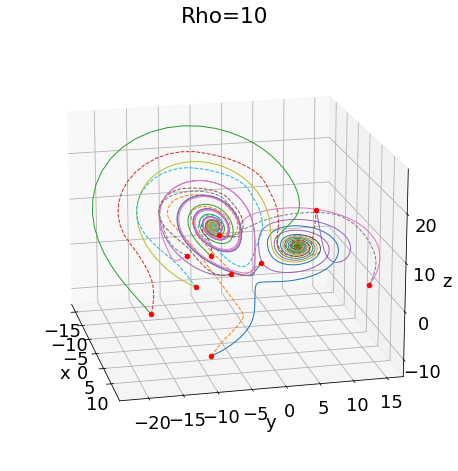

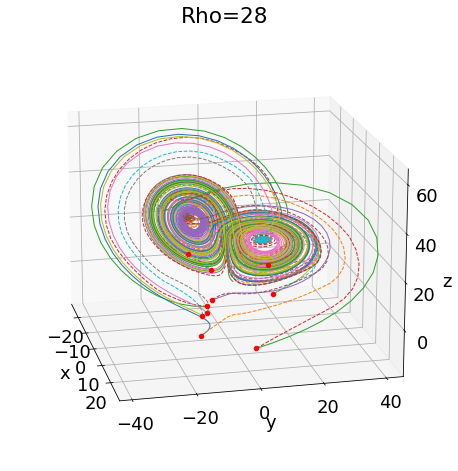

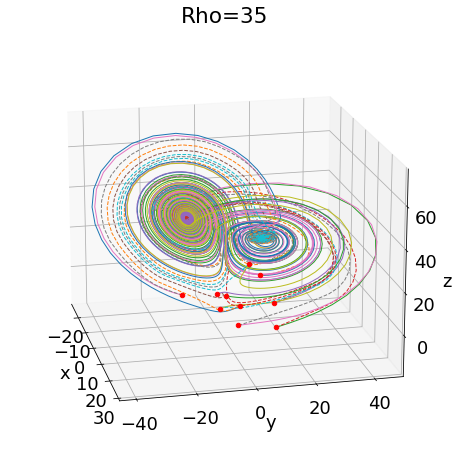

In [10]:
rho = 10
def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
    x, y, z = x_y_z
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]
x_t_10 = np.asarray([integrate.odeint(lorenz_deriv, nn_flow_10[i, 0, 0:-1], t) for i in range(num_traj)])
rho = 28
def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
    x, y, z = x_y_z
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]
x_t_28 = np.asarray([integrate.odeint(lorenz_deriv, nn_flow_28[i, 0, 0:-1], t) for i in range(num_traj)])
rho = 35
def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
    x, y, z = x_y_z
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]
x_t_35 = np.asarray([integrate.odeint(lorenz_deriv, nn_flow_35[i, 0, 0:-1], t) for i in range(num_traj)])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for j in range(num_traj):
    x, y, z = x_t_10[j, :, :].T
    xd, yd, zd = nn_flow_10[j, :, 0:-1].T
    ax.plot(x, y, z, linewidth=1)
    ax.plot(xd, yd, zd, '--', lw=1)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.scatter(x[0], y[0], z[0], color='r')
             
ax.view_init(18, -13)
plt.title('Rho=10')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for j in range(num_traj):
    x, y, z = x_t_28[j, :, :].T
    xd, yd, zd = nn_flow_28[j, :, 0:-1].T
    ax.plot(x, y, z, linewidth=1)
    ax.plot(xd, yd, zd, '--', lw=1)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.scatter(x[0], y[0], z[0], color='r')
             
ax.view_init(18, -13)
plt.title('Rho=28')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for j in range(num_traj):
    x, y, z = x_t_35[j, :, :].T
    xd, yd, zd = nn_flow_35[j, :, 0:-1].T
    ax.plot(x, y, z, linewidth=1)
    ax.plot(xd, yd, zd, '--', lw=1)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.scatter(x[0], y[0], z[0], color='r')
             
ax.view_init(18, -13)
plt.title('Rho=35')
plt.show()

Trajectory plot for Rho=10

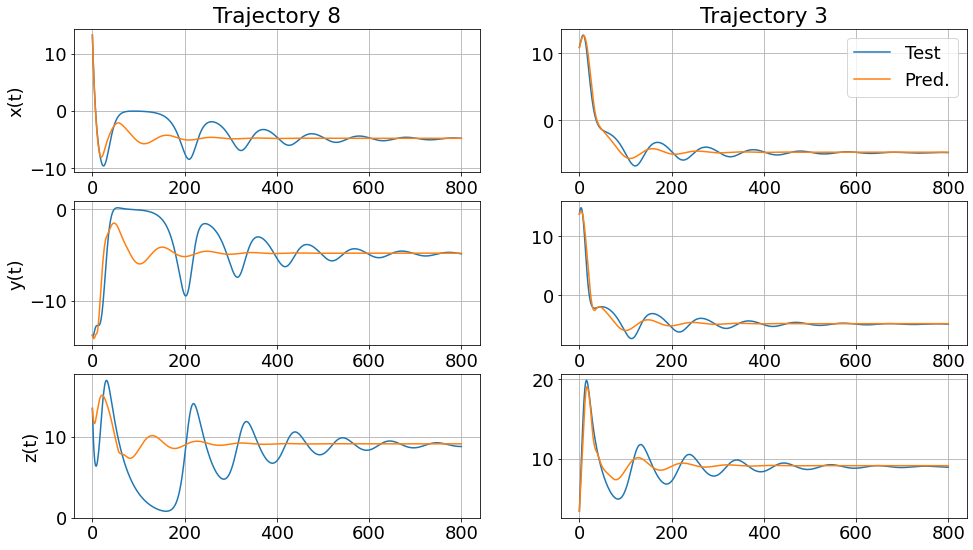

In [11]:
i=0
j=0
traj_plot = np.random.randint(0,9,2)
plt.figure(figsize=(16,9))
for i in range(3):

    for j in range(2):
        plt.subplot(3,2,i*2+1+j)
        plt.plot(x_t_10[traj_plot[j], :, i],label='Test')
        plt.plot(nn_flow_10[traj_plot[j], :, i],label='Pred.')
        plt.grid()
        
        if j==0:
            if i==0:
                plt.ylabel('x(t)')
            if i==1:
                plt.ylabel('y(t)')
            if i==2:
                plt.ylabel('z(t)')

        if j==1:
            if i==0:
                plt.legend()

                
        if i==0:
            str_tytle = 'Trajectory '+str(traj_plot[j])
            plt.title(str_tytle)


Trajectory plot for Rho=28

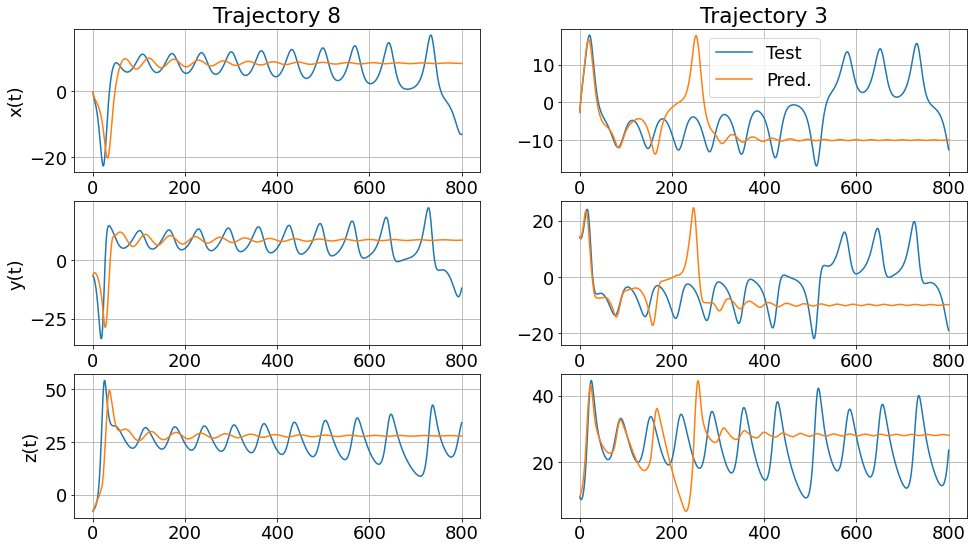

In [12]:
i=0
j=0
plt.figure(figsize=(16,9))
for i in range(3):

    for j in range(2):
        plt.subplot(3,2,i*2+1+j)
        plt.plot(x_t_28[traj_plot[j], :, i],label='Test')
        plt.plot(nn_flow_28[traj_plot[j], :, i],label='Pred.')
        plt.grid()
        
        if j==0:
            if i==0:
                plt.ylabel('x(t)')
            if i==1:
                plt.ylabel('y(t)')
            if i==2:
                plt.ylabel('z(t)')

        if j==1:
            if i==0:
                plt.legend()

                
        if i==0:
            str_tytle = 'Trajectory '+str(traj_plot[j])
            plt.title(str_tytle)


Trajectory plot for Rho=35

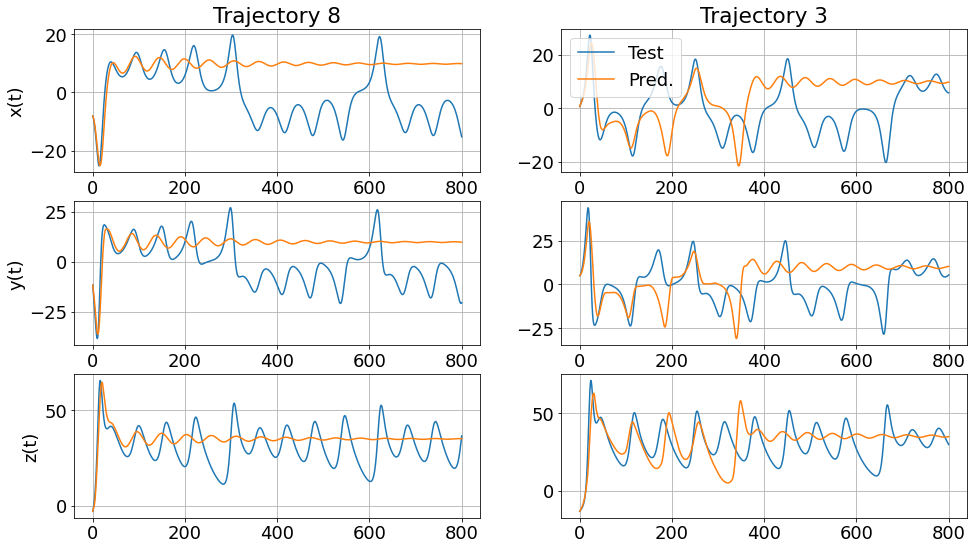

In [13]:
i=0
j=0
plt.figure(figsize=(16,9))
for i in range(3):

    for j in range(2):
        plt.subplot(3,2,i*2+1+j)
        plt.plot(x_t_35[traj_plot[j], :, i],label='Test')
        plt.plot(nn_flow_35[traj_plot[j], :, i],label='Pred.')
        plt.grid()
        
        if j==0:
            if i==0:
                plt.ylabel('x(t)')
            if i==1:
                plt.ylabel('y(t)')
            if i==2:
                plt.ylabel('z(t)')

        if j==1:
            if i==0:
                plt.legend()

                
        if i==0:
            str_tytle = 'Trajectory '+str(traj_plot[j])
            plt.title(str_tytle)


Evaluate trajectories for rho=17 and rho=40

In [14]:
# from tqdm import tqdm
np.random.seed(159)
num_traj = 10

nn_flow_17 = np.zeros((num_traj, len(t), 4))
nn_flow_17[:, 0, 0:3] = -15 + 30 * np.random.random((num_traj, 3))
nn_flow_17[:, :, -1] = 17*np.ones((num_traj, len(t)))
nn_flow_40 = np.zeros((num_traj, len(t), 4))
nn_flow_40[:, 0, 0:3] = -15 + 30 * np.random.random((num_traj, 3))
nn_flow_40[:, :, -1] = 40*np.ones((num_traj, len(t)))

nn_flow_17 = (nn_flow_17-min_i)/(max_i-min_i)
nn_flow_40 = (nn_flow_40-min_i)/(max_i-min_i)
for ii in range(num_traj):
    for jj, tval in enumerate(t[:-1]):
        nn_flow_17[ii, jj+1, 0:-1] = deep_approx.predict(np.reshape( nn_flow_17[ii, jj, :],(1,4) ))
        nn_flow_40[ii, jj+1, 0:-1] = deep_approx.predict(np.reshape(nn_flow_40[ii, jj, :],(1,4)))
        
nn_flow_17 = nn_flow_17*(max_i-min_i)+min_i
nn_flow_40 = nn_flow_40*(max_i-min_i)+min_i


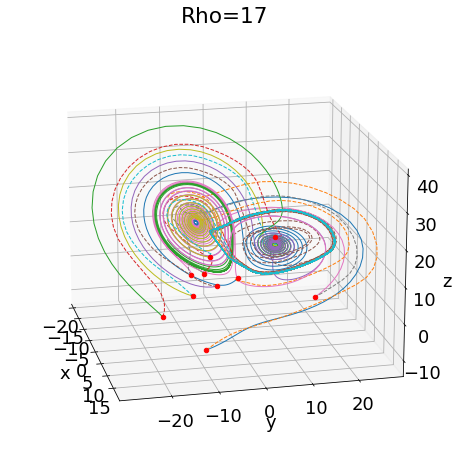

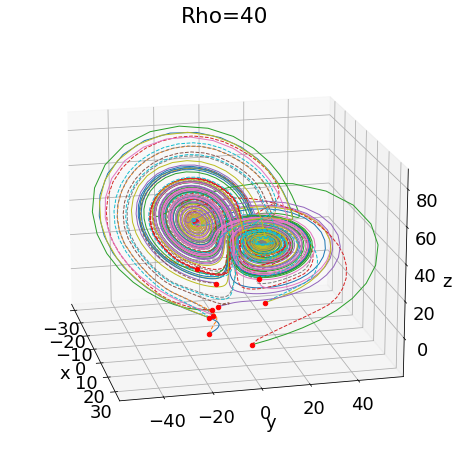

In [15]:
rho = 17
def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
    x, y, z = x_y_z
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]
x_t_17 = np.asarray([integrate.odeint(lorenz_deriv, nn_flow_17[i, 0, 0:-1], t) for i in range(num_traj)])
rho = 40
def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
    x, y, z = x_y_z
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]
x_t_40 = np.asarray([integrate.odeint(lorenz_deriv, nn_flow_40[i, 0, 0:-1], t) for i in range(num_traj)])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for j in range(num_traj):
    x, y, z = x_t_17[j, :, :].T
    xd, yd, zd = nn_flow_17[j, :, 0:-1].T
    ax.plot(x, y, z, linewidth=1)
    ax.plot(xd, yd, zd, '--', lw=1)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.scatter(x[0], y[0], z[0], color='r')
             
ax.view_init(18, -13)
plt.title('Rho=17')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for j in range(num_traj):
    x, y, z = x_t_40[j, :, :].T
    xd, yd, zd = nn_flow_40[j, :, 0:-1].T
    ax.plot(x, y, z, linewidth=1)
    ax.plot(xd, yd, zd, '--', lw=1)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.scatter(x[0], y[0], z[0], color='r')
             
ax.view_init(18, -13)
plt.title('Rho=40')
plt.show()

Trajectory plot for Rho=17

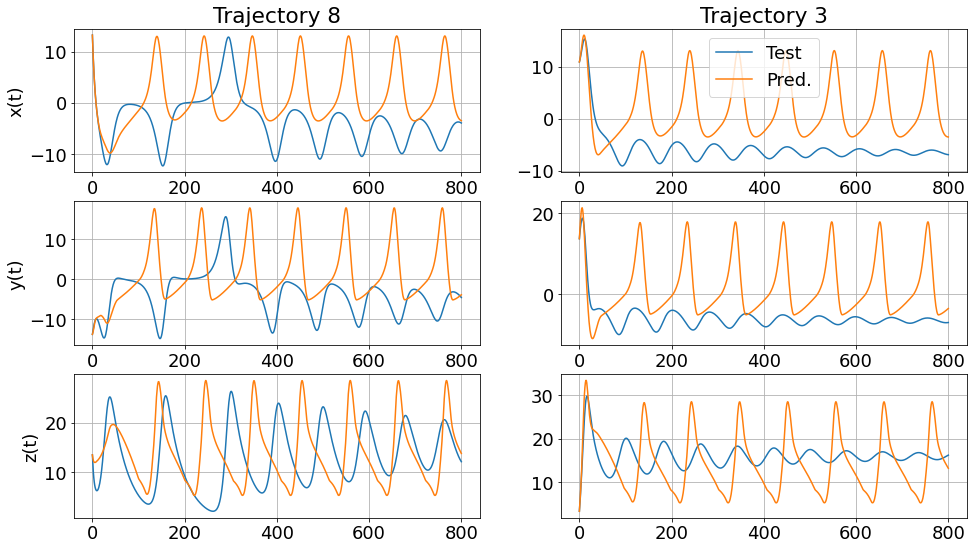

In [16]:
i=0
j=0
plt.figure(figsize=(16,9))
for i in range(3):

    for j in range(2):
        plt.subplot(3,2,i*2+1+j)
        plt.plot(x_t_17[traj_plot[j], :, i],label='Test')
        plt.plot(nn_flow_17[traj_plot[j], :, i],label='Pred.')
        plt.grid()
        
        if j==0:
            if i==0:
                plt.ylabel('x(t)')
            if i==1:
                plt.ylabel('y(t)')
            if i==2:
                plt.ylabel('z(t)')

        if j==1:
            if i==0:
                plt.legend()

                
        if i==0:
            str_tytle = 'Trajectory '+str(traj_plot[j])
            plt.title(str_tytle)

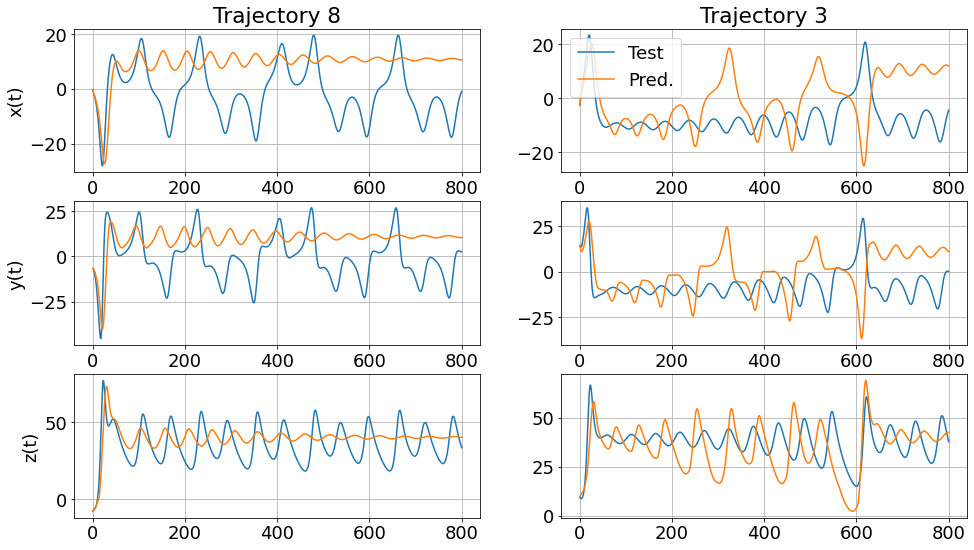

In [17]:
i=0
j=0
plt.figure(figsize=(16,9))
for i in range(3):

    for j in range(2):
        plt.subplot(3,2,i*2+1+j)
        plt.plot(x_t_40[traj_plot[j], :, i],label='Test')
        plt.plot(nn_flow_40[traj_plot[j], :, i],label='Pred.')
        plt.grid()
        
        if j==0:
            if i==0:
                plt.ylabel('x(t)')
            if i==1:
                plt.ylabel('y(t)')
            if i==2:
                plt.ylabel('z(t)')

        if j==1:
            if i==0:
                plt.legend()
                
        if i==0:
            str_tytle = 'Trajectory '+str(traj_plot[j])
            plt.title(str_tytle)

We calculate mean euclidean distance between test trajectories for rho=17 and rho=40

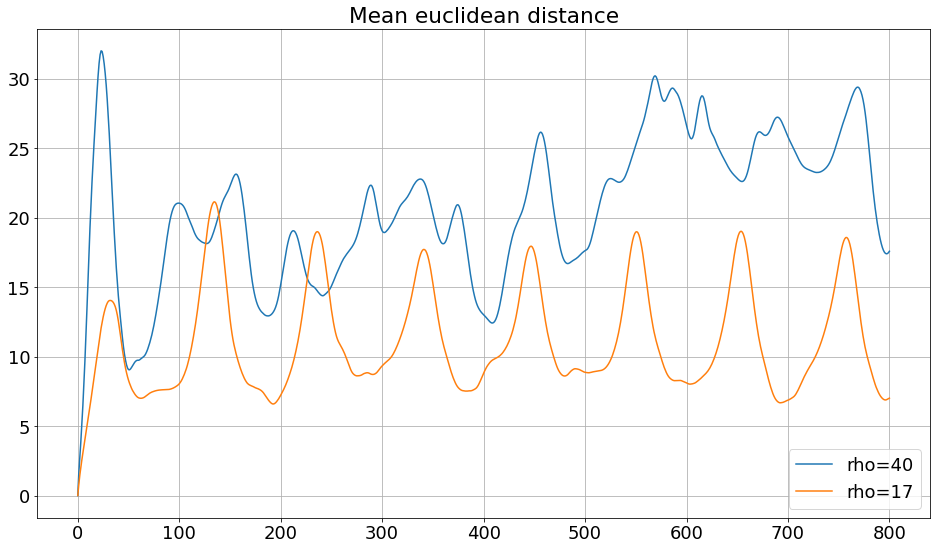

In [18]:
dist_40 = np.linalg.norm(x_t_40-nn_flow_40[:,:,0:3],axis=2)
dist_40_mean = np.mean(dist_40,axis=0)

dist_17 = np.linalg.norm(x_t_17-nn_flow_17[:,:,0:3],axis=2)
dist_17_mean = np.mean(dist_17,axis=0)

plt.figure(figsize=(16,9))
plt.plot(dist_40_mean,label='rho=40')
plt.plot(dist_17_mean,label='rho=17')
plt.grid()
plt.title('Mean euclidean distance')
plt.legend()
plt.show()
